# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

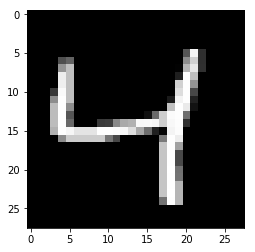

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32,(None,image_size))
targets_ = tf.placeholder(tf.float32,(None,image_size))

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6940
Epoch: 1/20... Training loss: 0.6913
Epoch: 1/20... Training loss: 0.6887
Epoch: 1/20... Training loss: 0.6859
Epoch: 1/20... Training loss: 0.6825
Epoch: 1/20... Training loss: 0.6793
Epoch: 1/20... Training loss: 0.6711
Epoch: 1/20... Training loss: 0.6677
Epoch: 1/20... Training loss: 0.6622
Epoch: 1/20... Training loss: 0.6518
Epoch: 1/20... Training loss: 0.6418
Epoch: 1/20... Training loss: 0.6323
Epoch: 1/20... Training loss: 0.6181
Epoch: 1/20... Training loss: 0.6072
Epoch: 1/20... Training loss: 0.5917
Epoch: 1/20... Training loss: 0.5788
Epoch: 1/20... Training loss: 0.5623
Epoch: 1/20... Training loss: 0.5494
Epoch: 1/20... Training loss: 0.5298
Epoch: 1/20... Training loss: 0.5093
Epoch: 1/20... Training loss: 0.4930
Epoch: 1/20... Training loss: 0.4750
Epoch: 1/20... Training loss: 0.4596
Epoch: 1/20... Training loss: 0.4474
Epoch: 1/20... Training loss: 0.4311
Epoch: 1/20... Training loss: 0.4141
Epoch: 1/20... Training loss: 0.3999
E

Epoch: 1/20... Training loss: 0.2002
Epoch: 1/20... Training loss: 0.1984
Epoch: 1/20... Training loss: 0.1981
Epoch: 1/20... Training loss: 0.2003
Epoch: 1/20... Training loss: 0.1974
Epoch: 1/20... Training loss: 0.2022
Epoch: 1/20... Training loss: 0.1968
Epoch: 1/20... Training loss: 0.1996
Epoch: 1/20... Training loss: 0.1980
Epoch: 1/20... Training loss: 0.1893
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.2056
Epoch: 1/20... Training loss: 0.2132
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1972
Epoch: 1/20... Training loss: 0.1993
Epoch: 1/20... Training loss: 0.2017
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1898
Epoch: 1/20... Training loss: 0.2066
Epoch: 1/20... Training loss: 0.1980
Epoch: 1/20... Training loss: 0.2079
Epoch: 1/20... Training loss: 0.1990
Epoch: 1/20... Training loss: 0.1987
Epoch: 1/20... Training loss: 0.1839
Epoch: 1/20... Training loss: 0.1942
Epoch: 1/20... Training loss: 0.1963
E

Epoch: 2/20... Training loss: 0.1664
Epoch: 2/20... Training loss: 0.1622
Epoch: 2/20... Training loss: 0.1630
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1604
Epoch: 2/20... Training loss: 0.1636
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1663
Epoch: 2/20... Training loss: 0.1688
Epoch: 2/20... Training loss: 0.1630
Epoch: 2/20... Training loss: 0.1618
Epoch: 2/20... Training loss: 0.1663
Epoch: 2/20... Training loss: 0.1661
Epoch: 2/20... Training loss: 0.1703
Epoch: 2/20... Training loss: 0.1652
Epoch: 2/20... Training loss: 0.1650
Epoch: 2/20... Training loss: 0.1608
Epoch: 2/20... Training loss: 0.1620
Epoch: 2/20... Training loss: 0.1688
Epoch: 2/20... Training loss: 0.1635
Epoch: 2/20... Training loss: 0.1616
Epoch: 2/20... Training loss: 0.1618
Epoch: 2/20... Training loss: 0.1611
Epoch: 2/20... Training loss: 0.1601
Epoch: 2/20... Training loss: 0.1592
Epoch: 2/20... Training loss: 0.1617
Epoch: 2/20... Training loss: 0.1701
E

Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1491
Epoch: 3/20... Training loss: 0.1446
Epoch: 3/20... Training loss: 0.1424
Epoch: 3/20... Training loss: 0.1411
Epoch: 3/20... Training loss: 0.1456
Epoch: 3/20... Training loss: 0.1422
Epoch: 3/20... Training loss: 0.1433
Epoch: 3/20... Training loss: 0.1426
Epoch: 3/20... Training loss: 0.1458
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1480
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1401
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1438
Epoch: 3/20... Training loss: 0.1410
Epoch: 3/20... Training loss: 0.1420
Epoch: 3/20... Training loss: 0.1462
Epoch: 3/20... Training loss: 0.1449
Epoch: 3/20... Training loss: 0.1411
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1440
Epoch: 3/20... Training loss: 0.1455
E

Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1312
Epoch: 4/20... Training loss: 0.1295
Epoch: 4/20... Training loss: 0.1328
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1322
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1326
Epoch: 4/20... Training loss: 0.1337
Epoch: 4/20... Training loss: 0.1288
Epoch: 4/20... Training loss: 0.1287
Epoch: 4/20... Training loss: 0.1292
Epoch: 4/20... Training loss: 0.1324
Epoch: 4/20... Training loss: 0.1322
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1343
Epoch: 4/20... Training loss: 0.1303
Epoch: 4/20... Training loss: 0.1294
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1291
Epoch: 4/20... Training loss: 0.1282
Epoch: 4/20... Training loss: 0.1309
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1240
E

Epoch: 5/20... Training loss: 0.1211
Epoch: 5/20... Training loss: 0.1191
Epoch: 5/20... Training loss: 0.1213
Epoch: 5/20... Training loss: 0.1210
Epoch: 5/20... Training loss: 0.1216
Epoch: 5/20... Training loss: 0.1207
Epoch: 5/20... Training loss: 0.1193
Epoch: 5/20... Training loss: 0.1212
Epoch: 5/20... Training loss: 0.1213
Epoch: 5/20... Training loss: 0.1172
Epoch: 5/20... Training loss: 0.1218
Epoch: 5/20... Training loss: 0.1204
Epoch: 5/20... Training loss: 0.1190
Epoch: 5/20... Training loss: 0.1206
Epoch: 5/20... Training loss: 0.1232
Epoch: 5/20... Training loss: 0.1208
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1181
Epoch: 5/20... Training loss: 0.1189
Epoch: 5/20... Training loss: 0.1187
Epoch: 5/20... Training loss: 0.1194
Epoch: 5/20... Training loss: 0.1199
Epoch: 5/20... Training loss: 0.1221
Epoch: 5/20... Training loss: 0.1203
Epoch: 5/20... Training loss: 0.1174
Epoch: 5/20... Training loss: 0.1173
Epoch: 5/20... Training loss: 0.1215
E

Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1102
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1142
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1176
Epoch: 6/20... Training loss: 0.1130
Epoch: 6/20... Training loss: 0.1123
Epoch: 6/20... Training loss: 0.1140
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1116
Epoch: 6/20... Training loss: 0.1131
Epoch: 6/20... Training loss: 0.1115
Epoch: 6/20... Training loss: 0.1137
Epoch: 6/20... Training loss: 0.1113
E

Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1116
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1108
Epoch: 6/20... Training loss: 0.1099
Epoch: 6/20... Training loss: 0.1014
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1095
Epoch: 6/20... Training loss: 0.1078
E

Epoch: 7/20... Training loss: 0.1085
Epoch: 7/20... Training loss: 0.1054
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1070
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1060
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1023
E

Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1037
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1029
Epoch: 8/20... Training loss: 0.1036
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.1030
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0993
E

Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.1015
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.1002
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0963
E

Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.1003
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0913
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0911
Epoch: 11/20... Training loss: 0.0910
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0898
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0902
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0898
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0896
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0890
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0894
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0984
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0889
Epoch: 15/20... Training loss: 0.0890
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0889
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0980
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0984
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0896
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0891
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0893
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0976
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0983
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0890
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0974
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0970
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

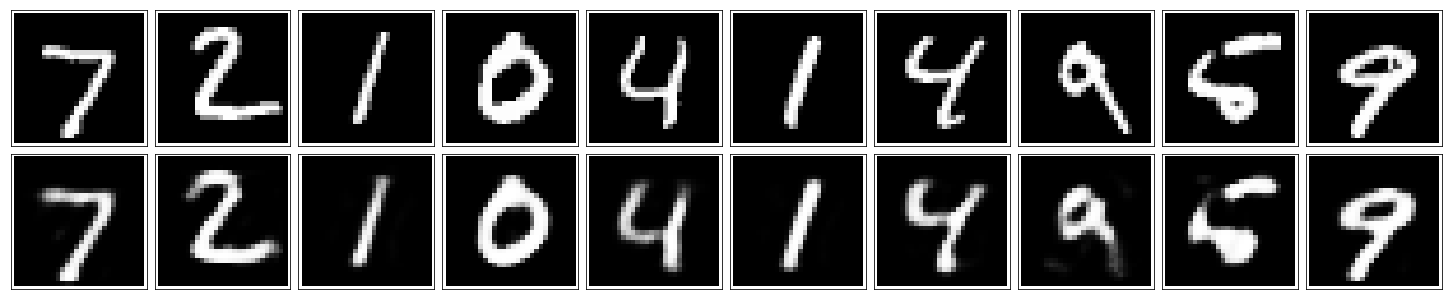

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.